# Linear regression

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AIForVet/aiml/blob/main/05-linear_regression.ipynb)

This notebook follows the content of the lesson on linear regression. In it, you can try to solve the task of determining real estate prices based on square footage.

First, load the libraries that we will need in further work.

In [25]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(37)

Now execute the following cell to generate the dataset of real estate properties. The information about the square footage is represented by the variable x while the information about their prices is represented by the variable y.

In [26]:
x = np.array([43, 25, 66, 80, 105, 70, 40, 85, 84, 102])
y = np.array([60, 32.1, 88.4, 111.4, 120.32, 72.1, 46.3, 90.1, 99.6, 139.2])

Execute the following cell to get a graphical representation of the points in the dataset.

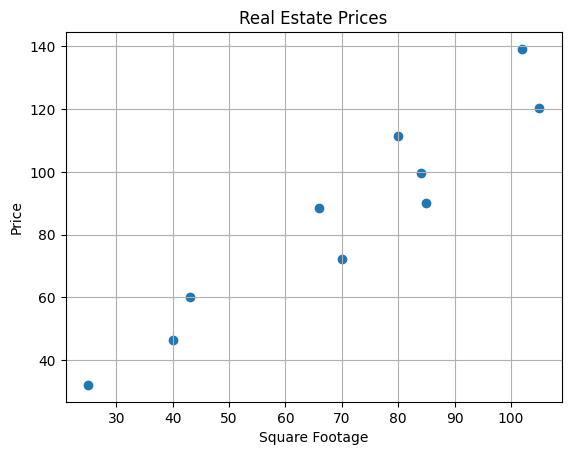

In [27]:
plt.title('Real Estate Prices')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.grid('on')
plt.scatter(x, y)
plt.show()

In the next cell, there is a function that will draw the line you choose in the exercise. Right below it is a function that draws the line you choose and the lines that indicate your errors. It might be useful to you when looking for the best parameter values.следећој ћелији се налази функција која ће исцртавати праву коју одабереш у вежби. Одмах испод ње је и функција која исцртава праву коју одабереш и линијице које означавају твоје грешке. Можда ће ти бити од користи приликом тражења најбољих вредности параметара.

In [16]:
def draw_graph(beta_0, beta_1):
  plt.title('Real Estate Prices')
  plt.xlabel('Square Footage')
  plt.ylabel('Price')
  plt.grid('on')
  plt.scatter(x, y)

  model_x = np.linspace(20, 120, 100)
  model_y = beta_0 + beta_1*model_x

  plt.plot(model_x, model_y, color='red')

  plt.show()

In [17]:
def draw_graph_with_errors(beta_0, beta_1):
  plt.title('Real Estate Prices')
  plt.xlabel('Square Footage')
  plt.ylabel('Price')
  plt.grid('on')
  plt.scatter(x, y)

  model_x = np.linspace(20, 120, 100)
  model_y = beta_0 + beta_1*model_x

  plt.plot(model_x, model_y, color='red')

  for i in range(0, 10):
    prediction = beta_0 + beta_1*x[i]
    if prediction > y[i]:
      ymin = y[i]
      ymax = prediction
    else:
      ymin = prediction
      ymax = y[i]

    plt.vlines(x=x[i], ymin=ymin, ymax=ymax, colors='blue', linestyles='dotted')

  plt.show()

Now try selecting the parameters $\beta_0$ and $\beta_1$: choose their values on the slider on the right side, and then execute the cell to see the result. You need to choose a pair of parameters that you think best fit the available data. The initial parameter values are $\beta_0=3.84$ and $\beta_1=0.62$.

Odabrani model: y = 3.84 + 0.62*x


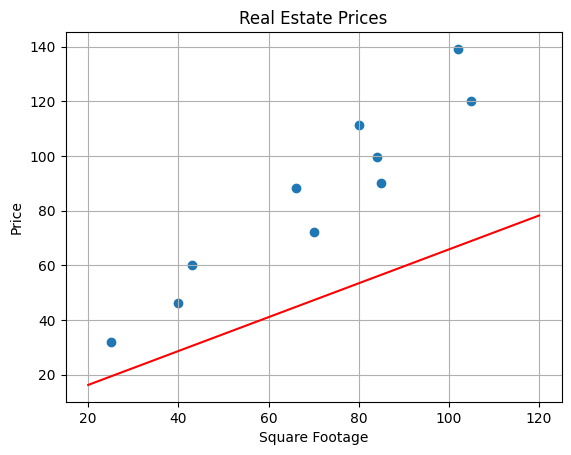

In [31]:
beta_0 = 3.84 #@param {type:"slider", min:-1, max:15, step:0.01}
beta_1 = 0.62 #@param {type:"slider", min:-2, max:4, step:0.01}
print("Odabrani model: y = {beta_0} + {beta_1}*x".format(beta_0=beta_0, beta_1=beta_1))
draw_graph(beta_0, beta_1)

In the cell below, you need to enter the values of the parameters $\beta_0$ and $\beta_1$ that you have chosen, and then execute the cell with the call to the `draw_graph_with_errors` function, which will show you the errors. If you think you can make better choices, go back to the previous step.

In [33]:
beta_0_selected = 3.84
beta_1_selected = 0.62

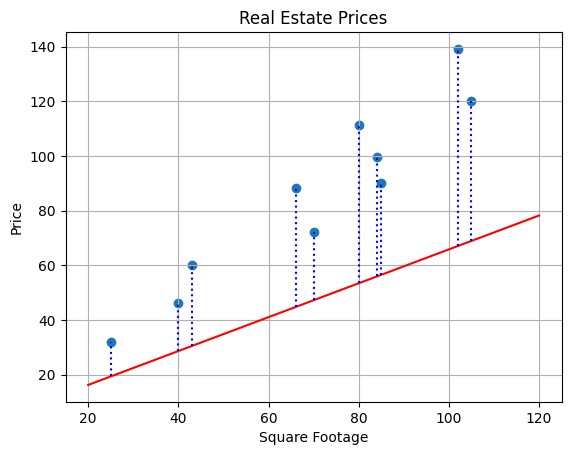

In [34]:
draw_graph_with_errors(beta_0_selected, beta_1_selected)

The error function associated with the linear regression model is called the `mean squared error`. The following function can help you calculate the mean squared error for your choice of parameters.

In [ ]:
def calculate_mean_squared_error(beta_0, beta_1, x, y):
  y_predictions = beta_0 + beta_1 * x
  individual_errors = y - y_predictions
  return np.average(individual_errors**2)

In [ ]:
calculate_mean_squared_error(beta_0_selected, beta_1_selected, x, y)

np.float64(1810.21888)

When calculating the mean squared error, we relied on the property of the `numpy` library that allows us to apply functions to vectors of values. Thus, with the command `y_predictions = beta_0 + beta_1*x`, we calculated the prediction values for all x's at once. Similarly, with the subtraction `individual_errors = y - y_predictions` when calculating individual differences and squaring them `individual_errors**2`. This way, the code is more readable and, more importantly, faster to compute. This is valuable to us due to working with large amounts of data. Of course, you can also write your own function to calculate the mean squared error for the chosen parameter values $\beta_0$ and $\beta_1$. A reminder is that it is calculated using the formula $MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i-(\beta_0 + \beta_1x_i))^2}$.

In [35]:
def my_function_to_calculate_mean_squared_error(beta_0, beta_1, x, y):
  pass